<a href="https://colab.research.google.com/github/stephanie0620/GenerativeModel/blob/main/AnalysisOfMNISTdatasetWithDNNandCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.3097 - accuracy: 0.9107 - val_loss: 0.1619 - val_accuracy: 0.9530
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1253 - accuracy: 0.9623 - val_loss: 0.1211 - val_accuracy: 0.9652
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0875 - accuracy: 0.9739 - val_loss: 0.0985 - val_accuracy: 0.9706
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0658 - accuracy: 0.9799 - val_loss: 0.1037 - val_accuracy: 0.9687
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0496 - accuracy: 0.9845 - val_loss: 0.0965 - val_accuracy: 0.9728
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0411 - accuracy: 0.9870 - val_loss: 0.0938 - val_accuracy: 0.9739
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.0956 - val_accuracy: 0.9752
Epoch 

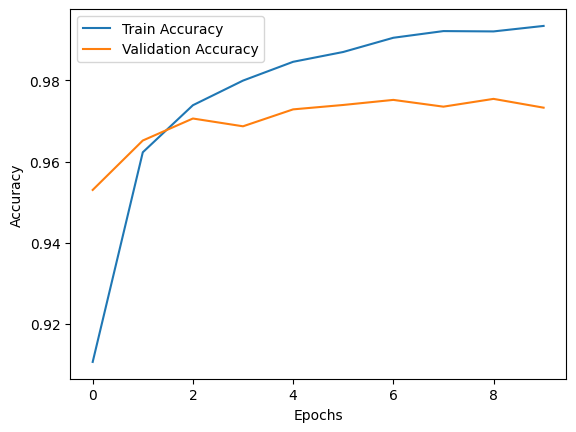

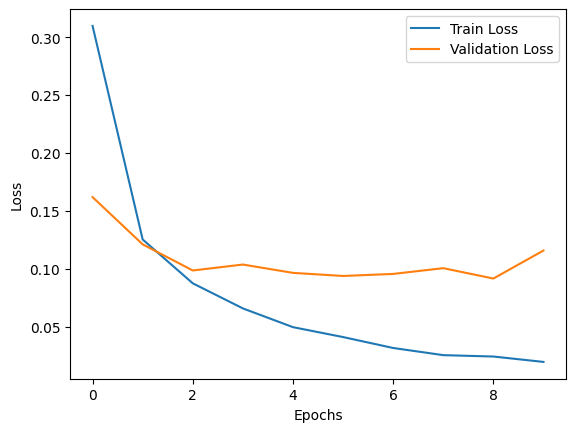

In [ ]:
"""
使用DNN
"""

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# 加载数据集并进行预处理
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 构建DNN模型
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 评估模型
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")
# 绘制准确度变化
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 绘制损失变化
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.1797 - accuracy: 0.9465 - val_loss: 0.0669 - val_accuracy: 0.9804
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0461 - val_accuracy: 0.9860
Epoch 3/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.0452 - val_accuracy: 0.9862
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0383 - val_accuracy: 0.9898
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0384 - val_accuracy: 0.9890
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0448 - val_accuracy: 0.9881
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0434 - val_accuracy: 0.9880
Epoch 

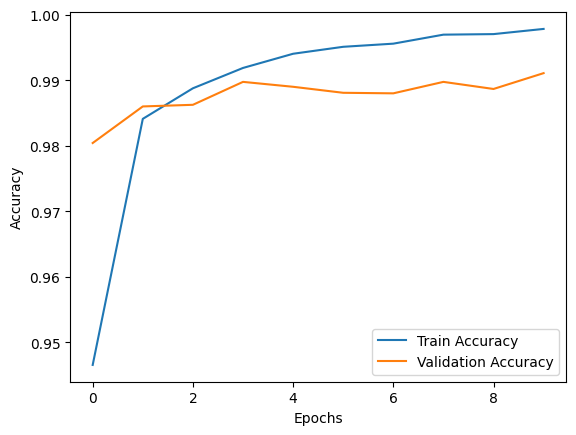

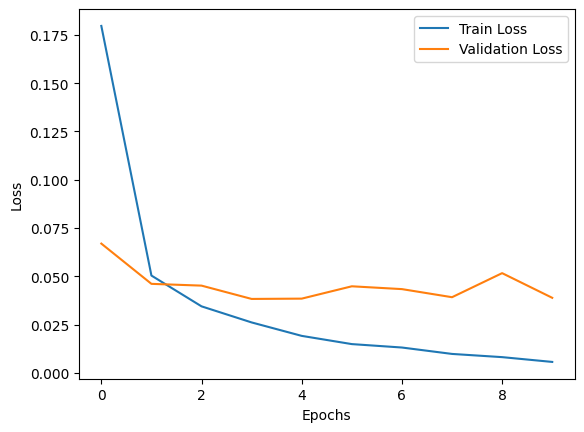

In [ ]:
"""
使用CNN
"""
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# 加载数据集并进行预处理
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 构建CNN模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 评估模型
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# 绘制准确度变化
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 绘制损失变化
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()